Business Questitions:

1. In case age is <18, replace it with mean of age values.

In [52]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
Cust_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Case Study 2- Credit Card//Case Study 2 - Credit Card Case Study//Customer Acqusition.csv')
Rep_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Case Study 2- Credit Card//Case Study 2 - Credit Card Case Study//Repayment.csv')
Spnd_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Case Study 2- Credit Card//Case Study 2 - Credit Card Case Study//spend.csv')

In [54]:
Cust_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [55]:
Rep_df.columns

Index(['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4'], dtype='object')

In [56]:
Spnd_df.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [57]:
Cust_spnd_df = pd.merge(left= Cust_df, right=Spnd_df, left_on='Customer', right_on='Customer', how='inner')
Cust_rep_df = pd.merge(left=Cust_df, right= Rep_df, left_on='Customer', right_on='Customer', how='inner')

In [58]:
Cust_spnd_df.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46


In [59]:
Cust_rep_df.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN


In [60]:
(Cust_spnd_df['Age'][Cust_spnd_df['Age']<18]).value_counts()

Age
16    34
13    31
15     3
12     2
Name: count, dtype: int64

In [61]:
Cust_spnd_df.loc[(Cust_spnd_df['Age']<18),['Age']] = Cust_spnd_df['Age'].mean()

2. if Spend Amount > Limit , replace it with 50% of Customers Limit.

In [62]:
Cust_spnd_df.loc[(Cust_spnd_df['Amount']>Cust_spnd_df['Limit']),['Amount']] = Cust_spnd_df['Limit']/2

In [63]:
(Cust_spnd_df['Amount']>Cust_spnd_df['Limit']).value_counts()

False    1500
Name: count, dtype: int64

3. if repayment amount > limit , replace it with limit.

In [64]:
Cust_rep_df.loc[(Cust_rep_df['Amount']>Cust_rep_df['Limit']),['Amount']] = Cust_rep_df['Limit']

4. How many distinct customers exist?

In [65]:
Cust_spnd_df['Customer'].nunique()

100

5. How many ditinct product categories exist?

In [66]:
Cust_spnd_df['Product'].value_counts()

Product
Gold        610
Platimum    570
Silver      320
Name: count, dtype: int64

6. Average monthly spend by Customers.

In [67]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount'],
      dtype='object')

In [68]:
Cust_spnd_df['Month'] = pd.to_datetime(Cust_spnd_df['Month'],errors='coerce')

In [69]:
Cust_spnd_df['Month'] = pd.to_datetime(Cust_spnd_df['Month'],format='%d-%m-%y')

In [70]:
Cust_spnd_df['Year'] = Cust_spnd_df['Month'].dt.year

In [71]:
(Cust_spnd_df['Year']).value_counts()

Year
2006    549
2005    532
2004    419
Name: count, dtype: int64

In [72]:
Cust_spnd_df['Month'] = Cust_spnd_df['Month'].dt.strftime('%b')

In [73]:
Monthly_spnd = Cust_spnd_df.groupby(by=['Year','Month'])[['Amount']].mean().reset_index()

In [74]:
Monthly_spnd['Amount'] = Monthly_spnd[['Amount']].round(2)

In [77]:
Monthly_spnd.rename(columns= {'Amount':'Avg_Monthly_Spnd'}, inplace= True)

In [80]:
Monthly_spnd.head(3)

,Year,Month,Avg_Monthly_Spnd
0,2004,Apr,124621.98
1,2004,Feb,136998.28
2,2004,Jan,144233.92


7. Average Monthly Repayment by Customers?

In [81]:
Cust_rep_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'SL No:', 'Month', 'Amount', 'Unnamed: 4'],
      dtype='object')

In [83]:
Cust_rep_df['Month'] = pd.to_datetime(Cust_rep_df['Month'], errors='coerce')

In [84]:
Cust_rep_df['Month'] = pd.to_datetime(Cust_rep_df['Month'], format='%d-%m-%y')

In [85]:
Cust_rep_df['Year'] = Cust_rep_df['Month'].dt.year

In [86]:
(Cust_rep_df['Year']).value_counts()

Year
2006    556
2005    536
2004    408
Name: count, dtype: int64

In [88]:
Cust_rep_df['Month'] = Cust_rep_df['Month'].dt.strftime('%b')

In [90]:
Monthly_repay = Cust_rep_df.groupby(['Year','Month'])[['Amount']].mean().reset_index()

In [91]:
Monthly_repay['Amount'] = Monthly_repay[['Amount']].round(2)

In [92]:
Monthly_repay.rename(columns={'Amount':'Avg_Monthly_Repayment'},inplace= True)

In [93]:
Monthly_repay.head(3)

,Year,Month,Avg_Monthly_Repayment
0,2004,Apr,175632.66
1,2004,Feb,125612.51
2,2004,Jan,159971.50


8. If ROI/Month = 2.9% then profit/Month = ?
  Monthly Profit = Monthly Repayment - Monthly Spend 
  [Interest is earned only on positive profits and not on negative Amounts]

In [96]:
Total_spend = Cust_spnd_df.groupby(by=['Year','Month']).agg(Monthly_spend = ('Amount','sum'))

In [98]:
Total_repay = Cust_rep_df.groupby(by=['Year','Month']).agg(Monthly_repay = ('Amount','sum'))

In [99]:
Profit = pd.merge(left=Total_spend, right=Total_repay, on= ['Year','Month'], how='inner')

In [101]:
Profit.head(3)

Monthly_spend  Monthly_repay
Year Month                              
2004 Apr       3489415.34     5268979.74
     Feb       3835951.84     3391537.65
     Jan      44279811.96    44792020.72

In [102]:
Profit['Profit'] = Profit['Monthly_repay'] - Profit['Monthly_spend']

In [104]:
Profit['Profit_with_interest'] = Profit['Profit'][Profit['Profit']>0]*0.029 + Profit['Profit']

In [106]:
Profit['Profit_with_interest'] = Profit[['Profit_with_interest']].round(2)

In [109]:
Profit.head(3)

Monthly_spend  Monthly_repay      Profit  Profit_with_interest
Year Month                                                                
2004 Apr       3489415.34     5268979.74  1779564.40            1831171.77
     Feb       3835951.84     3391537.65  -444414.19                   NaN
     Jan      44279811.96    44792020.72   512208.76             527062.81

9. Top 5 Product types

In [111]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Year'],
      dtype='object')

In [114]:
Cust_spnd_df['Type'].value_counts().head(5)

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

10. Which city is having Max. spend ?

In [115]:
Cust_spnd_df.groupby(by=['City'])[['Amount']].sum().sort_values(by='Amount', ascending= False)

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


11. Which age group is spending More?

In [121]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Year', 'Age_group'],
      dtype='object')

In [116]:
Cust_spnd_df['Age_group'] = pd.cut(Cust_spnd_df['Age'],bins=[0,30,55,80], labels= ['Young','Mid','Old'])

In [118]:
Cust_spnd_df.groupby(by=['Age_group'])[['Amount']].sum().round(2).sort_values(by='Amount', ascending= False)

,Amount
Age_group,
Mid,1.162742e+08
Young,5.268990e+07
Old,5.081696e+07


12. Top 10 Customers in terms of repayment

In [120]:
Cust_rep_df.groupby(by=['Customer'])[['Amount']].sum().round(2).sort_values(by='Amount',ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


13. Calculate the city wise spend on each products on yearly basis.

In [122]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Year', 'Age_group'],
      dtype='object')

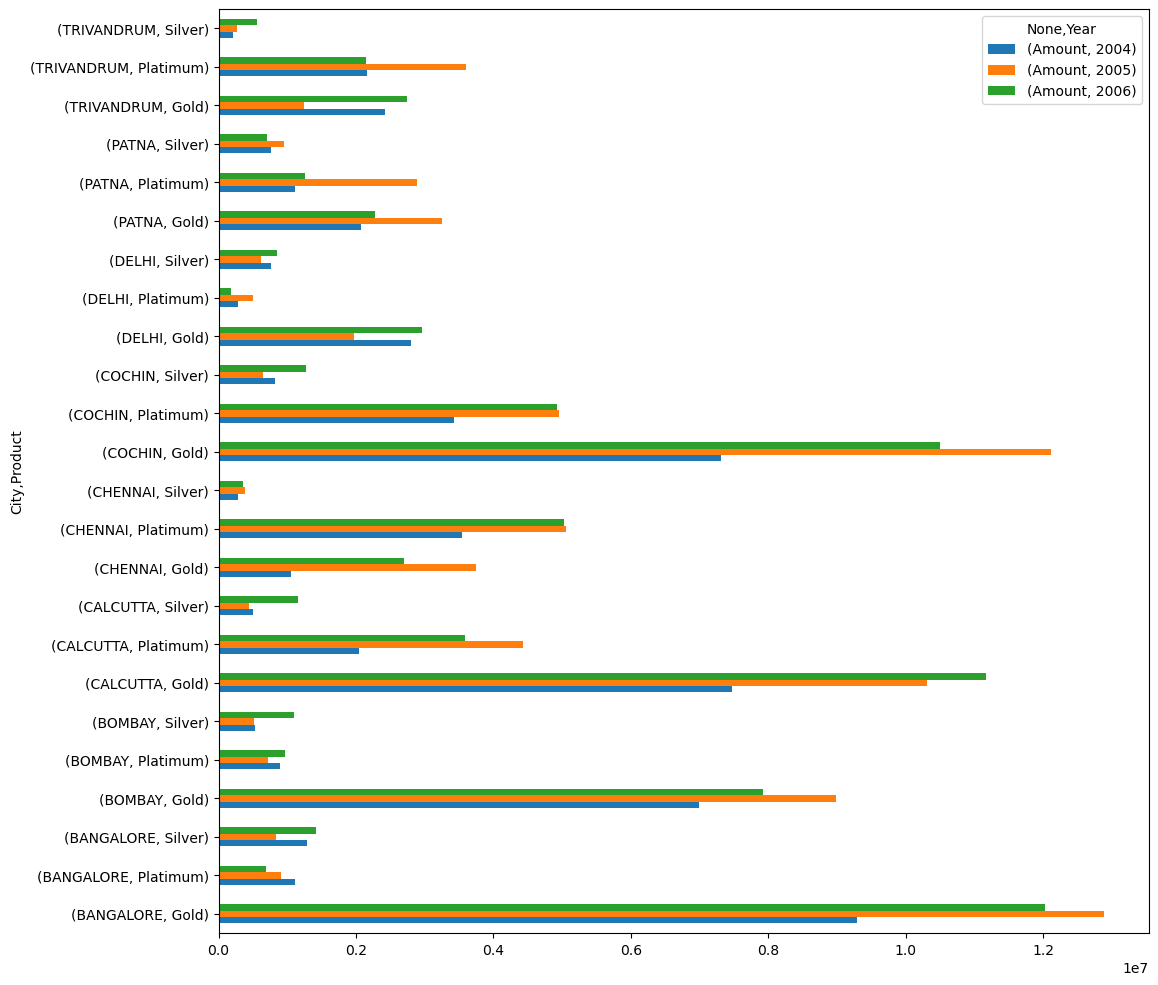

In [123]:
Cust_spnd_df.pivot_table(index=['City','Product'], columns= ['Year'], values= ['Amount'], aggfunc= np.sum).plot(kind='barh', figsize=(12,12))
plt.show()

14. Create graphs for 
    (i) Monthly comparision of total spends citywise.
    (ii) Comparision of yearly spend on air ticket.
    (iii) Comparision of monthly spend on each products (seasonality in terms of spend)

In [125]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Year', 'Age_group'],
      dtype='object')

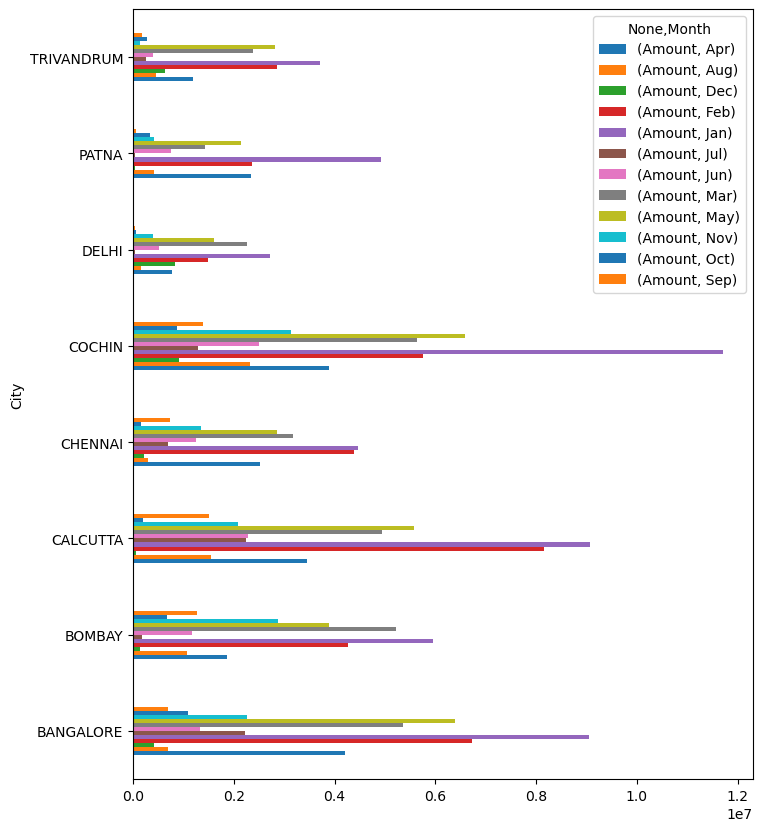

In [124]:
Cust_spnd_df.pivot_table(index= ['City'], columns= ['Month'], values= ['Amount'], aggfunc= np.sum).plot(kind = 'barh', figsize=(8,10))
plt.show()

In [126]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Year', 'Age_group'],
      dtype='object')

In [127]:
air_ticket = Cust_spnd_df.pivot_table(index=['Year'], columns=Cust_spnd_df['Type'][Cust_spnd_df['Type']=='AIR TICKET'], values=['Amount'], aggfunc= np.sum)

In [128]:
air_ticket

,Amount
Type,AIR TICKET
Year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


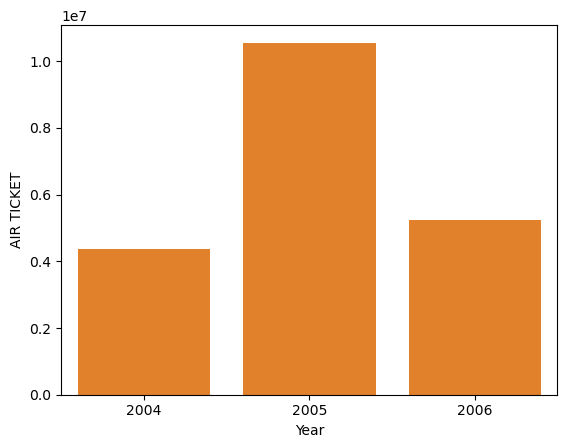

In [130]:
sns.barplot(data=air_ticket['Amount'], x=air_ticket.index, y='AIR TICKET')
plt.show()

In [131]:
Cust_spnd_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'Year', 'Age_group'],
      dtype='object')

In [132]:
Monthly_spend_product = Cust_spnd_df.pivot_table(index=['Month'], columns=['Product'], values=['Amount'], aggfunc=np.sum)

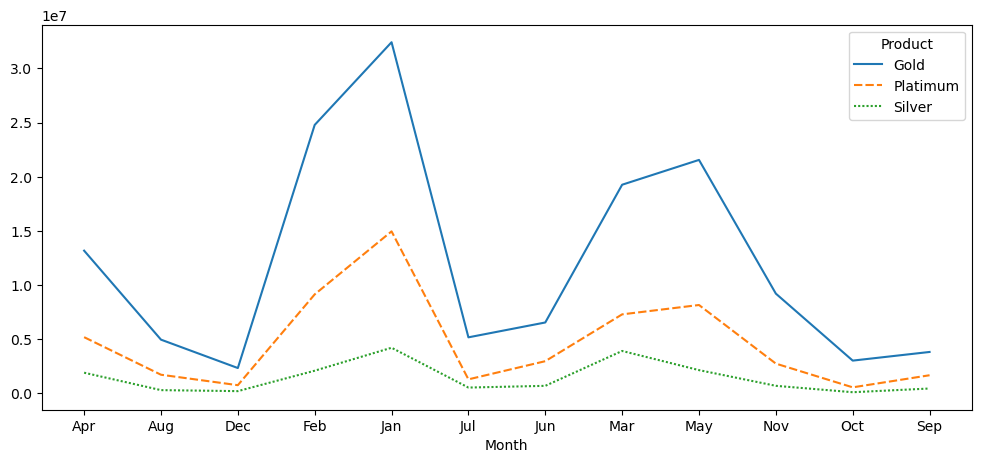

In [134]:
plt.figure(figsize=(12,5))
sns.lineplot(data=Monthly_spend_product['Amount'])
plt.show()

15. You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods.
   (i.e) year or month the user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function          should automatically take these input while identifying the top 10 Customers.


In [136]:
Cust_rep_df.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,Year
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,Jan,495414.75,NaN,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,Jan,245899.02,NaN,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,Jan,259490.06,NaN,2004


In [148]:
def top_10_customers(product,time_period):
    product = product.title()
    time_period = time_period.lower()
    product_wise = Cust_rep_df.loc[Cust_rep_df['Product']==product,['City','Year','Month','Customer','Amount']]
    if time_period == 'year':
        City_wise = product_wise.groupby(by=['City','Year','Customer'])[['Amount']].sum()
        City_wise = City_wise.sort_values(['City','Year','Amount'],ascending = [True,True,False])
        return City_wise.groupby(by=['City','Year']).head(10).reset_index()
    elif time_period == 'month':
        City_wise = product_wise.groupby(by=['City','Month','Customer'])[['Amount']].sum()
        City_wise = City_wise.sort_values(['City','Month','Amount'],ascending = [True,True,False])
        return City_wise.groupby(by=['City','Month']).head(10).reset_index()        
    else:
        return "Invalid time_period. Please enter 'Month' or 'Year'."
product = input("enter the product 'Gold'/'Silver'/'Platimum':").title()
time_period = input("enter the timer period 'Month'/'Year':").lower()

top_10_customers(product,time_period)

enter the product 'Gold'/'Silver'/'Platimum': Gold
enter the timer period 'Month'/'Year': Month


,City,Month,Customer,Amount
0,BANGALORE,Apr,A14,812582.20
1,BANGALORE,Apr,A43,612541.80
2,BANGALORE,Apr,A1,508949.16
3,BANGALORE,Apr,A13,494392.40
4,BANGALORE,Apr,A92,459105.69
...,...,...,...,...
206,TRIVANDRUM,Feb,A28,968709.79
207,TRIVANDRUM,Jan,A28,1034461.46
208,TRIVANDRUM,Jul,A28,380460.40
209,TRIVANDRUM,Mar,A28,1547067.86
